<a href="https://colab.research.google.com/github/vvrgit/NNDL-2020/blob/main/LAB04_CustomCNNmodel_Dr_Venkataramana_Veeramsetty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Import Libraries***

---

---





In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

import numpy as np
import pandas as pd

import keras

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras.models import Sequential
#from keras.models import Model
from keras.models import load_model

from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense
from keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam
from keras.applications.vgg16 import preprocess_input





import warnings
warnings.filterwarnings('ignore')

# ***Training parameters***

---

---





In [9]:
img_width, img_height = 150, 150
input_shape = (img_height, img_width, 3)
nb_train_samples = 4
nb_val_samples = 4
nb_epochs = 10
num_classes=2

In [10]:
train_data_dir = '/content/drive/MyDrive/train'
val_data_dir = '/content/drive/MyDrive/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=1, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height), 
                                                        batch_size=1,class_mode='categorical')

Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


# ***Build a classification model on top of Base Network***

---

---





In [11]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='valid',strides=1, input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='valid',strides=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20736)             0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [14]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint("best_Model.h5",save_best_only=True)

In [15]:
history = model.fit_generator( train_generator, callbacks = model_checkpoint_callback,epochs=nb_epochs, validation_data=validation_generator,verbose=1)
print('Training Completed!')
print(history.history.keys())

Epoch 1/10
4/4 [==============================] - 4s 992ms/step - loss: 3.1343 - accuracy: 0.2500 - val_loss: 1.0461 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 64ms/step - loss: 1.0329 - accuracy: 0.5000 - val_loss: 0.7462 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 90ms/step - loss: 0.6388 - accuracy: 0.5000 - val_loss: 0.7178 - val_accuracy: 0.2500
Epoch 4/10
4/4 [==============================] - 0s 110ms/step - loss: 0.5568 - accuracy: 1.0000 - val_loss: 0.7142 - val_accuracy: 0.2500
Epoch 5/10
4/4 [==============================] - 0s 78ms/step - loss: 0.4639 - accuracy: 1.0000 - val_loss: 0.7089 - val_accuracy: 0.2500
Epoch 6/10
4/4 [==============================] - 0s 147ms/step - loss: 0.3783 - accuracy: 1.0000 - val_loss: 0.7059 - val_accuracy: 0.7500
Epoch 7/10
4/4 [==============================] - 0s 79ms/step - loss: 0.2674 - accuracy: 1.0000 - val_loss: 0.6975 - val_accuracy: 0.7500
Epoch 8/10
4/4 [========

In [17]:
img_path = '/content/drive/MyDrive/cat.jpg'
label = ['Cat','Dog']
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

Predicted Array: [[1 0]]
Predicted Label: Cat


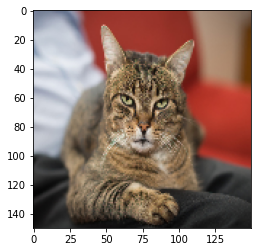

In [18]:
imgplot = plt.imshow(img)
plt.show()

In [19]:
model = load_model('/content/best_Model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20736)             0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [ ]:
img_path = '/content/drive/MyDrive/dog.jpg'
label = ['Cat','Dog']
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

Predicted Array: [[1 0]]
Predicted Label: Cat


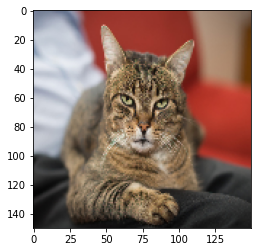

In [20]:
imgplot = plt.imshow(img)
plt.show()